# 6. Deep Learning Neural Network

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import Input
from keras.utils import np_utils
from keras.datasets import mnist
import visualkeras

import numpy as np


## Neuron Network

### 1. Create a model

- Create a model as a sequential model
- Defining the number of neuron in each layer and activation function

In [4]:
# Model / data parameter
num_classes = 10
input_shape = (784)

model = Sequential(
    [
        Input(shape=input_shape),
        Dense(32, activation='relu'),
        Dense(10, activation='softmax')
    ]
)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


2022-02-07 23:50:33.872895: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


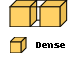

In [13]:
visualkeras.layered_view(model, legend=True, draw_volume=True, spacing=10)

#### Model parameters

- 1<sup>st</sup> layer: (784 + 1) * 32 = 25,120
- 2<sup>nd</sup> layer: (32 + 1) * 10 = 330
- Total parameter: 25,450


### 2. Compile a model

- Setting optimizer
  - `adam`, `SGD`, `rmsprop`, etc
- Setting loss function
  - `mean_squared_error`, `mean_absolute_error`, `categorical_crossentropy`, etc
- Setting evaluation metric

In [15]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])


### 3. Training a model

- Load MNIST data
- Traning data (60k) + Testing data (10k)
- Convert from 28x28 pixel to 784 one dimensional vector

In [14]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Convert from (28, 28) to (784)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Make sure images have shape (784)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")


# Convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [16]:
batch_size = 128
epochs = 15

model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=1, validation_split=.1)


2022-02-08 00:01:54.993679: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
422/422 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.8551 - val_loss: 0.2355 - val_accuracy: 0.9348
Epoch 2/15
422/422 [==============================] - 0s 908us/step - loss: 0.2538 - accuracy: 0.9291 - val_loss: 0.1828 - val_accuracy: 0.9512
Epoch 3/15
422/422 [==============================] - 0s 903us/step - loss: 0.2079 - accuracy: 0.9413 - val_loss: 0.1543 - val_accuracy: 0.9588
Epoch 4/15
422/422 [==============================] - 0s 908us/step - loss: 0.1787 - accuracy: 0.9483 - val_loss: 0.1396 - val_accuracy: 0.9623
Epoch 5/15
422/422 [==============================] - 0s 912us/step - loss: 0.1583 - accuracy: 0.9539 - val_loss: 0.1255 - val_accuracy: 0.9667
Epoch 6/15
422/422 [==============================] - 0s 910us/step - loss: 0.1416 - accuracy: 0.9592 - val_loss: 0.1202 - val_accuracy: 0.9647
Epoch 7/15
422/422 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9628 - val_loss: 0.1160 - val_accuracy: 0.9

### 4. Evaluate the trained model

In [17]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.10482573509216309
Test accuracy: 0.9681000113487244


## Convolutional Neuron Network (CNN)

### 1. Create a model

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)


cnn_model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation="softmax"),
    ]
)

cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

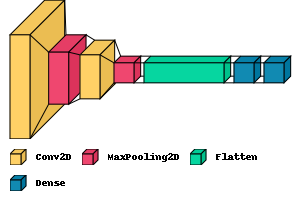

In [12]:
visualkeras.layered_view(cnn_model, legend=True, draw_volume=True, spacing=10)


### 2. Complie a model

In [84]:
cnn_model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

### 3. Training a model

- Load MNIST data
- Traning data (60k) + Testing data (10k)

In [82]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_train.shape[0], "test samples")


# Convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
60000 test samples


In [85]:
batch_size = 128
epochs = 15

cnn_model.fit(X_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=1, validation_split=.1)


Epoch 1/15
422/422 [==============================] - 17s 40ms/step - loss: 0.3123 - accuracy: 0.9106 - val_loss: 0.0941 - val_accuracy: 0.9738
Epoch 2/15
422/422 [==============================] - 17s 40ms/step - loss: 0.0858 - accuracy: 0.9733 - val_loss: 0.0608 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 0.0492 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0503 - accuracy: 0.9844 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 5/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0426 - val_accuracy: 0.9863
Epoch 6/15
422/422 [==============================] - 18s 41ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0396 - val_accuracy: 0.9887
Epoch 7/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0344 - val_accuracy:

### 4. Evaluate the trained model

In [86]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.04123755171895027
Test accuracy: 0.9883999824523926
